#  Exploratory Data Analysis on YouTube Trending Videos


## 1. Introduction

This analysis was conducted to explore how specific categorical factors namely the day of publication, video category, and country of publication influence the view counts of YouTube videos. The goal is to identify patterns that can inform strategic decisions for improving audience engagement and content performance.

As the creator of a YouTube channel focused on teaching TI-84 Plus calculator tutorials, I am considering expanding my content into different categories and potentially creating videos in another language. From a business perspective, it is essential to understand what factors drive visibility and engagement. Therefore, this study seeks to answer three key questions:

    Does the day a video is published affect its view count?
        – This will help identify the most effective day to upload new videos.

    Which video categories receive the highest average views?
        – This will provide insight into which content types attract greater audience interest.

    Does the publishing country influence view counts?
        – This will help evaluate whether producing videos in English or Turkish would be more beneficial.

The dataset used in this study consists of trending YouTube videos, including variables such as publication date, country, category, and total views. Since these features are categorical rather than numerical, traditional correlation techniques like Pearson correlation are not suitable due to their assumptions of linearity and numerical continuity.

Instead, a mean comparison approach was applied to analyze variations in average view counts across different groups. This method provides a more accurate and interpretable understanding of how categorical variables influence numerical outcomes, without introducing bias from arbitrary numerical encodings.

Ultimately, this analysis aims to determine whether publication timing, content category, or country of origin plays the most significant role in influencing audience reach and engagement on YouTube. The findings will not only contribute to data driven content planning but also help shape future strategies for channel growth and language selection.

## 2. Data Overview

The dataset used in this analysis originates from YouTube’s trending videos data, which contains metadata for a large number of videos across multiple countries. Each record represents a single trending video and includes variables such as video title, category, publication date, country, and total number of views.

For the purposes of this study, three key variables were selected to examine their relationship with video view counts:

Published Day of the Week: The day each video was published, categorized from Monday to Sunday.

Category: The type of content as defined by YouTube’s category IDs, which were mapped to their corresponding names (e.g., Music, Education, Comedy).

Country: The country in which the video was published, represented by standardized two letter country codes.

Before conducting the analysis, the dataset was preprocessed to ensure data consistency and interpretability. Missing values were removed where necessary, categorical identifiers were mapped to descriptive labels, and all analyses were performed on cleaned and structured data.

This prepared dataset enables a focused examination of how publication timing, video category, and country of origin may influence overall video performance as measured by view counts.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('youtube.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")

# Display first few rows for inspection
#df.head()

Dataset loaded successfully!
Shape: (161470, 18)


## 3. Analysis and Results


### 3.1 Does the Day a Video Is Published Affect Its View Count?

This section analyzes the published_day_of_week variable to determine whether the day a video is uploaded influences its total view count. Descriptive statistics such as the mean, standard deviation, and mode are first computed to examine how video uploads are distributed across different days of the week.

Although correlation analysis was initially considered, it was not applied because published_day_of_week is a categorical and cyclic variable rather than a continuous numerical one. Correlation techniques, such as Pearson’s correlation, assume linearity and numerical continuity, which are not valid for this type of data. Therefore, a mean comparison approach was employed to assess variations in average view counts across the days of the week, providing a more reliable and interpretable understanding of the relationship.

**Analysis:**  


In [10]:
# Analyze the distribution of views by published day of the week and print summary statistics (mean, std, mode)
def analyze_day_views(df):
    """
    Analyze view distribution by published_day_of_week.
    Calculates mean, standard deviation, and mode of publishing days (encoded numerically).
    """
    # Check if required columns exist
    if 'published_day_of_week' not in df.columns or 'views' not in df.columns:
        raise KeyError("The DataFrame must contain 'published_day_of_week' and 'views' columns.")
    
    # Create a copy to avoid modifying the original DataFrame
    df_day_views = df[['published_day_of_week', 'views']].copy()

    # Convert days of the week into numeric order for calculation
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df_day_views['day_num'] = df_day_views['published_day_of_week'].apply(
        lambda x: days_order.index(x) if x in days_order else None
    )

    # Calculate statistics
    mean_day = df_day_views['day_num'].mean()
    std_day = df_day_views['day_num'].std()
    mode_day = df_day_views['published_day_of_week'].mode()[0]

    # Print results
    print("PUBLISHED DAY STATISTICS:\n")
    print("Mean (numeric day):", mean_day)
    print("Standard Deviation:", std_day)
    print("Mode (most frequent day):", mode_day)

In [11]:
# Pie chart showing total views distribution by published day of the week
def plot_views_pie_by_day(df):
    """
    Create a pie chart showing the total views distribution 
    by published day of the week.
    """

    # Check if columns exist
    if 'published_day_of_week' not in df.columns or 'views' not in df.columns:
        raise KeyError("The DataFrame must contain 'published_day_of_week' and 'views' columns.")
    
    # Group by day of the week and sum views
    views_by_day = df.groupby('published_day_of_week')['views'].sum().reindex(
        ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    )

    # Plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        views_by_day,
        labels=views_by_day.index,
        autopct='%1.1f%%',
        startangle=90,
        shadow=True
    )
    plt.title('Total Views Distribution by Day of the Week', fontsize=14)
    plt.show()

In [12]:
def analyze_day_views_correlation(df):
    """
    Analyze if publishing day affects view counts.
    Shows average views for each day and compares them.
    """
    # Check if required columns exist
    if 'published_day_of_week' not in df.columns or 'views' not in df.columns:
        raise KeyError("The DataFrame must contain 'published_day_of_week' and 'views' columns.")
    
    # Drop missing values
    df_clean = df[['published_day_of_week', 'views']].dropna()
    
    if df_clean.empty:
        print(" No valid data available.")
        return
    
    # Set day order
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    # Calculate average views per day
    day_avg = df_clean.groupby('published_day_of_week')['views'].mean().reindex(days_order)
    
    # Calculate overall average
    overall_avg = df_clean['views'].mean()
    
    # Print results
    print("Average views by day of the week:\n")
    for day, avg_views in day_avg.items():
        diff_percent = ((avg_views - overall_avg) / overall_avg) * 100
        print(f"{day}: {avg_views:,.0f} ({diff_percent:+.1f}% from average)")
    
    print(f"\nOverall average: {overall_avg:,.0f}")
    
    # Calculate range
    highest = day_avg.max()
    lowest = day_avg.min()
    range_percent = ((highest - lowest) / overall_avg) * 100
    
    print(f"\nRange: {highest:,.0f} - {lowest:,.0f} ({range_percent:.1f}% difference)")
    
    # Interpretation
    if range_percent > 50:
        print(" Strong effect — publishing day strongly affects view counts.")
    elif range_percent > 20:
        print(" Moderate effect — publishing day moderately affects view counts.")
    else:
        print(" Weak effect — publishing day has small effect on view counts.")

**Results:**  


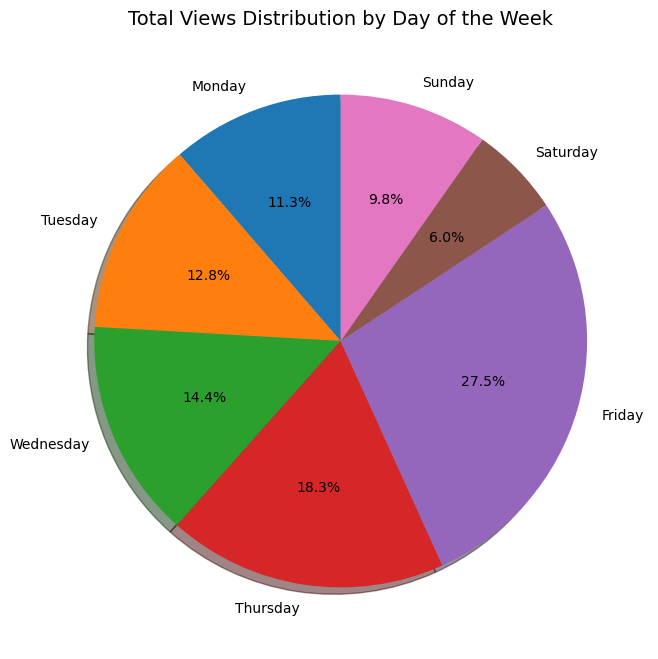

PUBLISHED DAY STATISTICS:

Mean (numeric day): 2.822121756363411
Standard Deviation: 1.900048715075042
Mode (most frequent day): Friday
Average views by day of the week:

Monday: 1,887,318 (-22.0% from average)
Tuesday: 2,079,608 (-14.1% from average)
Wednesday: 2,202,413 (-9.0% from average)
Thursday: 2,778,910 (+14.8% from average)
Friday: 3,755,648 (+55.2% from average)
Saturday: 1,444,060 (-40.3% from average)
Sunday: 2,110,650 (-12.8% from average)

Overall average: 2,419,854

Range: 3,755,648 - 1,444,060 (95.5% difference)
 Strong effect — publishing day strongly affects view counts.


In [14]:
plot_views_pie_by_day(df)
analyze_day_views(df)
analyze_day_views_correlation(df)

### Analysis: Impact of Publishing Day on YouTube Views

To examine whether the day of publication influences video performance, I analyzed the distribution of uploads and the average number of views across the week. The results show a strong effect of publishing day on view counts. Videos uploaded on Friday received the highest average number of views (3,755,648, +55.2% above average), followed by Thursday (2,778,910, +14.8% above average). In contrast, videos published on Saturday performed the worst, with an average of 1,444,060 views (−40.3% below average). This pattern suggests that audiences are more active and engaged near the end of the workweek, possibly due to increased leisure time and higher platform activity. In particular, viewers may be more likely to watch YouTube videos on Fridays after work, as they transition into the weekend and have more free time available for entertainment or learning content.

Additionally, I computed descriptive statistics for the variable published_day_of_week: the mean (2.82), standard deviation (1.90), and mode (Friday). However, only the mode provides a truly meaningful insight because this variable is categorical and cyclic, not numerical. The mean and standard deviation assume a linear numeric scale, which is not applicable here since the days of the week have no inherent order, and after Sunday, the sequence returns to Monday. Therefore, while these numerical calculations are mathematically possible, they are conceptually misleading. The mode, which correctly identifies the most frequent publishing day (Friday), is the most interpretable and relevant measure for this analysis.

In conclusion, the findings suggest that uploading videos toward the end of the workweek, especially on Fridays, is the most effective strategy for maximizing visibility and engagement. For my YouTube channel, this means scheduling new TI-84 Plus calculator tutorials on Fridays could help attract a larger audience and strengthen viewer interaction. This insight provides a practical, data-driven foundation for optimizing my upload schedule as part of a broader content growth strategy.

### 3.2 Which Video Categories Receive the Highest Average Views?

This section investigates whether different YouTube video categories influence total view counts. The analysis begins by examining the category_name variable to understand how views are distributed across various content types. Descriptive statistics, including the mean, standard deviation, and mode, are computed after encoding categories alphabetically to ensure consistency.

Since category_name is a categorical nominal variable without inherent numerical order, correlation techniques are not suitable for this analysis. Instead, a mean comparison approach is applied to evaluate differences in average view counts among categories. This method provides a clearer understanding of which content types may attract greater audience engagement and potentially perform better on the platform.

**Analysis:**  


In [18]:
# Map YouTube category IDs to their corresponding category names for better readability and analysis
df['category_id'].unique()

category_map = {
    1: "Film & Animation",
    2: "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    19: "Travel & Events",
    20: "Gaming",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "Howto & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism",
    30: "Movies",
    43: "Shows",
    44: "Trailers"
}

df["category_name"] = df["category_id"].map(category_map)


In [19]:
# Analyze the distribution of views by YouTube category (alphabetical order)
def analyze_category_views_alphabetical(df):
    """
    Analyze view distribution by category_name using a fixed alphabetical order.
    Calculates mean, standard deviation, and mode of categories (encoded alphabetically).
    """

    # Define a fixed alphabetical order for YouTube categories
    category_order = [
        "Autos & Vehicles", "Comedy", "Education", "Entertainment", "Film & Animation",
        "Gaming", "Howto & Style", "Movies", "Music", "News & Politics",
        "Nonprofits & Activism", "People & Blogs", "Pets & Animals",
        "Science & Technology", "Shows", "Sports", "Trailers", "Travel & Events"
    ]

    # Check if the necessary columns exist
    if 'category_name' not in df.columns or 'views' not in df.columns:
        raise KeyError("The DataFrame must contain 'category_name' and 'views' columns.")
    
    # Create a copy to avoid modifying the original DataFrame
    df_cat = df[['category_name', 'views']].copy()

    # Assign a fixed numeric code based on alphabetical order
    df_cat['cat_num'] = df_cat['category_name'].apply(
        lambda x: category_order.index(x) + 1 if x in category_order else None
    )

    # Calculate statistics
    mean_cat = df_cat['cat_num'].mean()
    std_cat = df_cat['cat_num'].std()
    mode_cat = df_cat['category_name'].mode()[0]

    # Print results
    print("Mean (alphabetical numeric code):", mean_cat)
    print("Standard Deviation:", std_cat)
    print("Mode (most frequent category):", mode_cat)

    
    return df_cat

In [20]:
def analyze_category_views_correlation(df):
    """
    Analyze if video category affects view counts.
    Shows average views for each category and compares them.
    """

    # Check if required columns exist
    if 'category_name' not in df.columns or 'views' not in df.columns:
        raise KeyError("The DataFrame must contain 'category_name' and 'views' columns.")
    
    # Drop missing values
    df_clean = df[['category_name', 'views']].dropna()
    
    if df_clean.empty:
        print(" No valid data available.")
        return
    
    # Method: Mean Comparison
    # Calculate average views per category
    category_avg = df_clean.groupby('category_name')['views'].mean().sort_values(ascending=False)
    
    # Calculate overall average
    overall_avg = df_clean['views'].mean()
    
    # Print results
    print("Average views by category:\n")
    for category, avg_views in category_avg.items():
        diff_percent = ((avg_views - overall_avg) / overall_avg) * 100
        print(f"{category}: {avg_views:,.0f} ({diff_percent:+.1f}% from average)")
    
    print(f"\nOverall average: {overall_avg:,.0f}")
    
    # Calculate range
    highest = category_avg.max()
    lowest = category_avg.min()
    range_percent = ((highest - lowest) / overall_avg) * 100
    
    print(f"\nRange: {highest:,.0f} - {lowest:,.0f} ({range_percent:.1f}% difference)")
    
    # Interpretation
    if range_percent > 100:
        print(" Strong effect — video category strongly affects view counts.")
    elif range_percent > 50:
        print(" Moderate effect — video category moderately affects view counts.")
    elif range_percent > 20:
        print(" Weak effect — video category has small effect on view counts.")
    else:
        print(" Very weak effect — video category does not strongly affect views.")


In [21]:
# Bar chart showing total views by YouTube category (alphabetical or natural order)
def plot_views_bar_by_category(df):
    """
    Create a bar chart showing total views by YouTube category.
    Groups data by 'category_name' and sorts by total views (descending).
    """

    # Check if columns exist
    if 'category_name' not in df.columns or 'views' not in df.columns:
        raise KeyError("The DataFrame must contain 'category_name' and 'views' columns.")

    # Group by category and sum total views
    views_by_category = (
        df.groupby('category_name')['views']
        .sum()
        .sort_values(ascending=True)  # ascending=True for horizontal bars (largest at top)
    )

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(views_by_category.index, views_by_category.values, color='skyblue', edgecolor='black')
    plt.title('Total Views by YouTube Category', fontsize=14)
    plt.xlabel('Total Views', fontsize=12)
    plt.ylabel('Category', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.ticklabel_format(style='plain', axis='x')  # disable scientific notation
    plt.xticks(
        plt.xticks()[0],
        [f'{int(x/1e9)}B' for x in plt.xticks()[0]]  # show values as billions
    )
    plt.tight_layout()
    plt.show()

**Results:**  


In [23]:
plot_views_bar_by_category(df_cat_alphabetical)
df_cat_alphabetical = analyze_category_views_alphabetical(df)
analyze_category_views_correlation(df)


NameError: name 'df_cat_alphabetical' is not defined

### Analysis: Impact of Video Category on View Counts

To examine how video category influences view counts, I analyzed the distribution of total and average views across YouTube content categories. The results reveal that a few categories dominate the platform. Music videos achieved the highest average views (8.2 million), approximately 239.9% higher than the dataset’s overall average (2.4 million). This reflects their global popularity and cross-cultural appeal. Music’s repetitive listening nature and social-media virality further amplify its visibility, allowing it to reach exceptionally high engagement levels.

The Entertainment category ranked second, appealing to a broad and diverse audience. Unlike educational or niche topics that attract limited groups, entertainment content can engage viewers of all ages and backgrounds, making it one of the most universally accessible categories.

In contrast, Trailers, News & Politics, and Education showed the lowest engagement, up to 99% below the mean, indicating a strong effect of category type on view counts. Descriptive statistics also showed Entertainment as the most frequent category, reinforcing its widespread presence on the platform.

Overall, video category has a substantial impact on audience engagement, with Music and Entertainment emerging as the most influential genres for maximizing visibility and reach.
For my YouTube channel, which focuses on TI-84 Plus calculator tutorials, these findings highlight the challenge of competing within the Education category, where audience reach is typically lower. However, they also suggest a strategic opportunity: incorporating entertaining or real-life relatable examples into tutorial content could make educational videos more engaging and appealing to a broader audience. This insight will guide future content development toward balancing informative and entertaining elements to increase viewer interest and retention.

### 3.3 Does the Publishing Country Influence View Counts?

This section investigates whether the country where a video is published influences its total number of views. The publish_country variable is analyzed to identify potential differences in audience engagement across geographical regions. Descriptive statistics such as the mean, standard deviation, and mode are first computed to summarize how view counts vary by country.

Although correlation analysis was initially considered, it was not applied because publish_country is a categorical nominal variable rather than a numerical one. Correlation methods, such as Pearson’s correlation, require continuous numerical data and linear relationships, which are not valid in this context. Therefore, a mean comparison approach was employed to evaluate variations in average view counts across countries, providing a more interpretable understanding of how geographical factors may influence video performance and audience reach.

**Analysis:**  


In [ ]:
def analyze_country_views(df):
    """
    Analyze the distribution of publish_country (independent of views).
    Calculates mean, standard deviation, and mode of countries (encoded numerically).
    """
    # Check if required column exists
    if 'publish_country' not in df.columns:
        raise KeyError("The DataFrame must contain 'publish_country' column.")
    
    # Create a copy to avoid modifying the original DataFrame
    df_country = df[['publish_country']].copy()
    
    # Convert country names into numeric codes
    df_country['country_num'] = df_country['publish_country'].astype('category').cat.codes
    
    # Calculate statistics
    mean_country = df_country['country_num'].mean()
    std_country = df_country['country_num'].std()
    mode_country = df_country['publish_country'].mode()[0]
    
    # Print results
    print("PUBLISHED COUNTRY STATISTICS:\n")
    print(f"Mean (numeric code): {mean_country:.2f}")
    print(f"Standard Deviation: {std_country:.2f}")
    print(f"Mode (most frequent country): {mode_country}\n")


In [ ]:
def analyze_country_views_correlation(df):
    """
    Analyze if publishing country affects view counts.
    Shows average views for each country and compares them.
    """
    # Check if required columns exist
    if 'publish_country' not in df.columns or 'views' not in df.columns:
        raise KeyError("The DataFrame must contain 'publish_country' and 'views' columns.")
    
    # Drop missing values
    df_clean = df[['publish_country', 'views']].dropna()
    
    if df_clean.empty:
        print(" No valid data available.")
        return
    
    # Calculate average views per country
    country_avg = df_clean.groupby('publish_country')['views'].mean().sort_values(ascending=False)
    
    # Calculate overall average
    overall_avg = df_clean['views'].mean()
    
    # Print results
    print("AVERAGE VIEWS BY COUNTRY:\n")
    for country, avg_views in country_avg.items():
        diff_percent = ((avg_views - overall_avg) / overall_avg) * 100
        print(f"{country}: {avg_views:,.0f} ({diff_percent:+.1f}% from average)")
    
    print(f"\nOverall average: {overall_avg:,.0f}")
    
    # Calculate the range (difference between highest and lowest)
    highest = country_avg.max()
    lowest = country_avg.min()
    range_percent = ((highest - lowest) / overall_avg) * 100
    
    print(f"\nRange: {highest:,.0f} - {lowest:,.0f} ({range_percent:.1f}% difference)")
    
    # Interpretation
    if range_percent > 100:
        print(" Strong effect — publishing country strongly affects view counts.")
    elif range_percent > 50:
        print(" Moderate effect — publishing country moderately affects view counts.")
    elif range_percent > 20:
        print(" Weak effect — publishing country has small effect on view counts.")
    else:
        print(" Very weak effect — publishing country does not strongly affect views.")



In [ ]:
# Pie chart showing total views distribution by publish_country
def plot_views_pie_by_country(df):
    """
    Create a pie chart showing the total views distribution by publish_country.
    Groups total views by country and displays their share as percentages.
    """

    # Drop missing countries if any
    df = df.dropna(subset=['publish_country'])

    # Group by country and sum total views
    views_by_country = df.groupby('publish_country')['views'].sum().sort_values(ascending=False)

    # Check if data exists
    if views_by_country.empty:
        print("No data found for 'publish_country'.")
        return

    # Plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        views_by_country,
        labels=views_by_country.index,
        autopct='%1.1f%%',
        startangle=90,
        shadow=True
    )
    plt.title('Total Views Distribution by Country', fontsize=14)
    plt.show()


%matplotlib inline

**Results:**  


In [ ]:
plot_views_pie_by_country(df)
analyze_country_views(df)
analyze_country_views_correlation(df)

### Analysis: Impact of Publishing Country on View Counts

The analysis of publishing countries is based on the four regions available in the dataset — United States (US), Great Britain (GB), Canada (CA), and France (FR). Therefore, these results reflect patterns within this limited sample rather than global YouTube trends.

The pie chart shows that Great Britain (GB) accounts for the largest share of total views (58.9%), followed by the United States (24.7%), Canada (12.0%), and France (4.4%). The average view counts further confirm this trend: GB videos received approximately 5.9 million views on average (+144.3% above the dataset average), while French videos had the lowest average (0.42 million views, −82.6% below the average). Although these averages provide a useful comparison, they have limited interpretive value since the variable publish_country is categorical rather than numerical.

One possible explanation is that English-speaking countries such as the US, GB, and Canada have significantly larger global audiences and broader accessibility, which naturally increases engagement. In contrast, content published in non-English-speaking countries tends to reach smaller, more localized audiences.

Overall, while the publishing country appears to strongly affect view counts in this dataset, this finding provides a valuable insight for my YouTube channel. Since my videos focus on TI-84 Plus calculator tutorials, producing content in English would likely increase accessibility and visibility among a broader, international audience. However, continuing to create occasional Turkish-language content could help maintain a loyal and culturally connected viewer base. Balancing both languages strategically would allow the channel to expand its reach while preserving authenticity and inclusivity.

## 4. Conclusion

This exploratory data analysis examined how three categorical factors — publishing day, video category, and publishing country — influence YouTube view counts. The findings revealed that these variables collectively shape audience engagement patterns and can serve as valuable indicators for optimizing content strategies.

The results show that publishing day significantly affects audience engagement, with videos uploaded on Fridays and Thursdays achieving the highest view counts. This pattern suggests that users are more active near the end of the workweek, likely due to increased leisure time and a greater tendency to consume online content before the weekend.

Video category also plays a major role in performance outcomes. Music and Entertainment emerged as the most popular categories, reflecting their universal appeal and emotional resonance. In contrast, Educational content, such as tutorial videos, tends to attract a smaller but more focused audience. This highlights the importance of integrating engaging elements — such as storytelling, humor, or real-life examples — into educational materials to make them more accessible and appealing to a wider audience.

The analysis of publishing country further revealed that videos published in English-speaking countries (GB, US, CA) receive substantially higher engagement compared to non-English-speaking regions. This reflects the global accessibility and broader reach of English-language content on YouTube.

For my YouTube channel, which focuses on TI-84 Plus calculator tutorials, these insights provide actionable, data-driven guidance. Publishing new videos on Fridays, emphasizing engaging and relatable teaching approaches, and producing content primarily in English — while occasionally incorporating Turkish-language videos to maintain cultural connection — would collectively help maximize visibility, viewer retention, and audience diversity.

In conclusion, this analysis demonstrates that understanding audience behavior through data can transform creative decision-making. By aligning upload timing, content design, and language choice with observable engagement trends, my channel can continue to grow strategically, balancing educational value with broader viewer appeal.

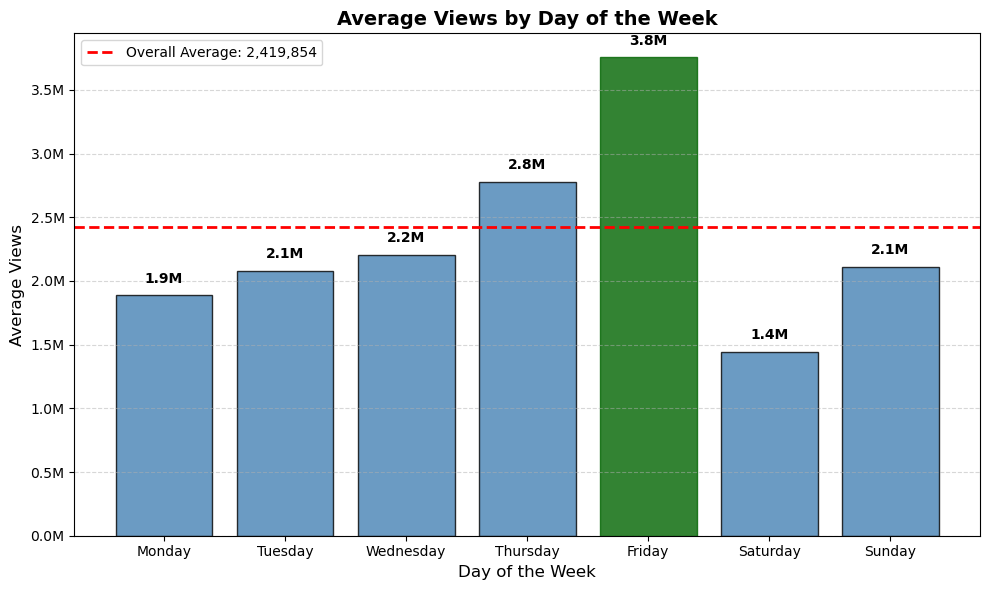

In [28]:
def plot_average_views_bar_by_day(df):
    """
    Create a bar chart showing average views by day of the week.
    Includes a horizontal line showing the overall average.
    """
    # Check if required columns exist
    if 'published_day_of_week' not in df.columns or 'views' not in df.columns:
        raise KeyError("The DataFrame must contain 'published_day_of_week' and 'views' columns.")
    
    # Define day order
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    # Calculate average views per day
    day_avg = df.groupby('published_day_of_week')['views'].mean().reindex(days_order)
    
    # Calculate overall average
    overall_avg = df['views'].mean()
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(day_avg.index, day_avg.values, color='steelblue', edgecolor='black', alpha=0.8)
    
    # Add horizontal line for overall average
    plt.axhline(y=overall_avg, color='red', linestyle='--', linewidth=2, label=f'Overall Average: {overall_avg:,.0f}')
    
    # Highlight Friday (highest) in a different color
    bars[4].set_color('darkgreen')
    
    # Add value labels on top of bars
    for i, (day, value) in enumerate(zip(day_avg.index, day_avg.values)):
        plt.text(i, value + 100000, f'{value/1e6:.1f}M', ha='center', fontsize=10, fontweight='bold')
    
    # Labels and title
    plt.title('Average Views by Day of the Week', fontsize=14, fontweight='bold')
    plt.xlabel('Day of the Week', fontsize=12)
    plt.ylabel('Average Views', fontsize=12)
    plt.legend(loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Format y-axis to show values in millions
    ax = plt.gca()
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_average_views_bar_by_day(df)

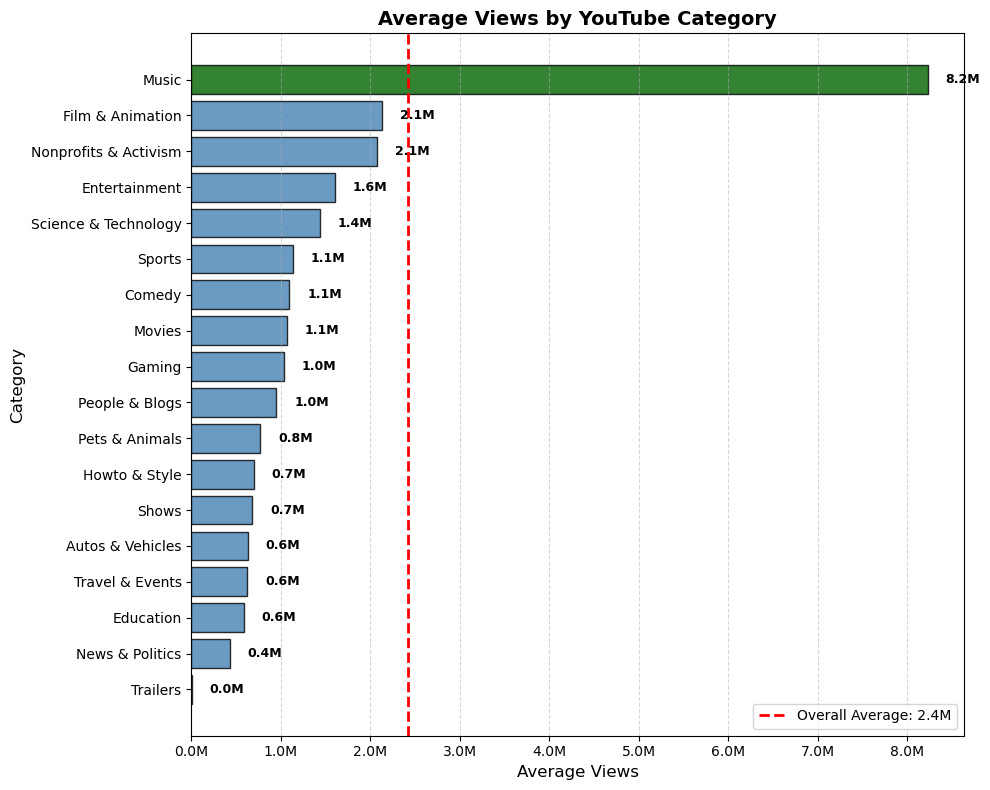

In [30]:
def plot_average_views_bar_by_category(df):
    """
    Create a horizontal bar chart showing average views by category.
    Includes a vertical line showing the overall average.
    """
    # Check if required columns exist
    if 'category_name' not in df.columns or 'views' not in df.columns:
        raise KeyError("The DataFrame must contain 'category_name' and 'views' columns.")
    
    # Drop missing values
    df_clean = df[['category_name', 'views']].dropna()
    
    # Calculate average views per category
    category_avg = df_clean.groupby('category_name')['views'].mean().sort_values(ascending=True)
    
    # Calculate overall average
    overall_avg = df_clean['views'].mean()
    
    # Create color list - highlight Music in different color
    colors = ['darkgreen' if cat == 'Music' else 'steelblue' for cat in category_avg.index]
    
    # Create the horizontal bar chart
    plt.figure(figsize=(10, 8))
    bars = plt.barh(category_avg.index, category_avg.values, color=colors, edgecolor='black', alpha=0.8)
    
    # Add vertical line for overall average
    plt.axvline(x=overall_avg, color='red', linestyle='--', linewidth=2, 
                label=f'Overall Average: {overall_avg/1e6:.1f}M')
    
    # Add value labels at the end of bars
    for i, (category, value) in enumerate(zip(category_avg.index, category_avg.values)):
        plt.text(value + 200000, i, f'{value/1e6:.1f}M', 
                va='center', fontsize=9, fontweight='bold')
    
    # Labels and title
    plt.title('Average Views by YouTube Category', fontsize=14, fontweight='bold')
    plt.xlabel('Average Views', fontsize=12)
    plt.ylabel('Category', fontsize=12)
    plt.legend(loc='lower right')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    
    # Format x-axis to show values in millions
    ax = plt.gca()
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_average_views_bar_by_category(df)

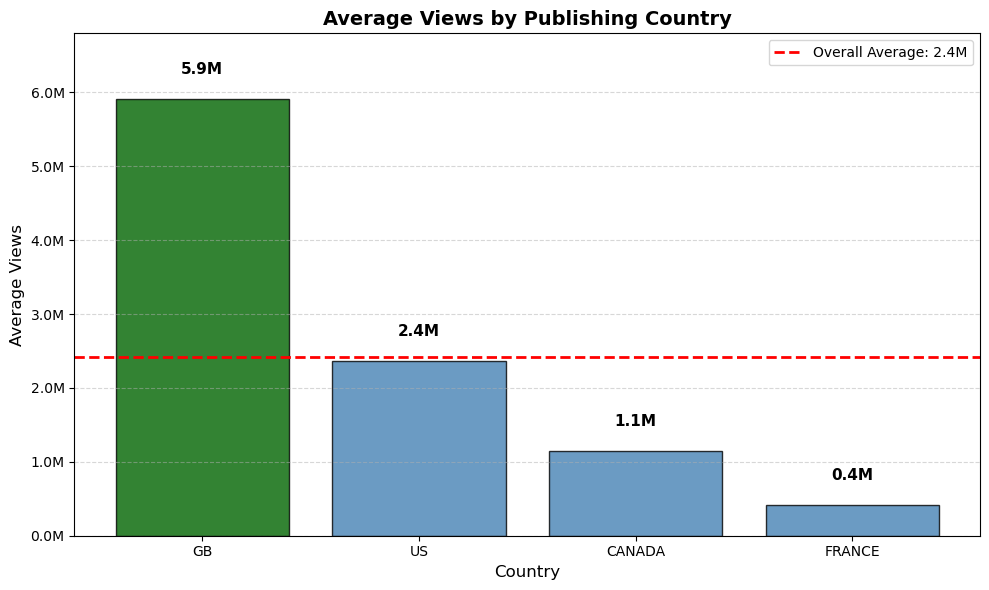

In [32]:
def plot_average_views_bar_by_country(df):
    """
    Create a bar chart showing average views by country.
    Includes a horizontal line showing the overall average.
    """
    # Check if required columns exist
    if 'publish_country' not in df.columns or 'views' not in df.columns:
        raise KeyError("The DataFrame must contain 'publish_country' and 'views' columns.")
    
    # Drop missing values
    df_clean = df[['publish_country', 'views']].dropna()
    
    # Calculate average views per country
    country_avg = df_clean.groupby('publish_country')['views'].mean().sort_values(ascending=False)
    
    # Calculate overall average
    overall_avg = df_clean['views'].mean()
    
    # Create color list - highlight GB (highest) in different color
    colors = ['darkgreen' if country == 'GB' else 'steelblue' for country in country_avg.index]
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(country_avg.index, country_avg.values, color=colors, edgecolor='black', alpha=0.8)
    
    # Add horizontal line for overall average
    plt.axhline(y=overall_avg, color='red', linestyle='--', linewidth=2, 
                label=f'Overall Average: {overall_avg/1e6:.1f}M')
    
    # Add value labels on top of bars
    for i, (country, value) in enumerate(zip(country_avg.index, country_avg.values)):
        # Position text above the bar with more spacing
        plt.text(i, value + 300000, f'{value/1e6:.1f}M', 
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # Labels and title
    plt.title('Average Views by Publishing Country', fontsize=14, fontweight='bold')
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Average Views', fontsize=12)
    plt.legend(loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Format y-axis to show values in millions
    ax = plt.gca()
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
    
    # Adjust y-axis limit to give more space above highest bar
    plt.ylim(0, country_avg.max() * 1.15)
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_average_views_bar_by_country(df)